# CARNEGIE MELLON UNIVERSITY

**Name**: Junxiao Guo

**Andrew ID**: junxiaog

**Course**: DATA, INFERENCE & APPLIED MACHINE LEARNING (COURSE 18-785)

**ASSIGNMENT 3**

In [2]:
%config IPCompleter.greedy=True
# !pip install numpy
# !pip install pandas
# !pip install matplotlib
# !pip install scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import matplotlib.dates as mdates


## Quesiont 1

In [3]:
hypo_mean = 7725
calorie_stat = np.array([5260, 5470, 5640, 6180, 6390, 6515, 6805, 7515, 7515, 8230, 8770])
sample_mean,sample_std,sample_ste = np.mean(calorie_stat),np.std(calorie_stat),stats.sem(calorie_stat)
# t_stat,pval = stats.ttest_1samp(calorie_stat,ret_mean)
# t_stat = np.abs(sample_mean - hypo_mean) / ((sample_std)/np.sqrt(len(calorie_stat)))
dof = len(calorie_stat)-1
# pval =2*(1 - stats.t.cdf(calorie_stat,df=dof))

t_stat,pval = stats.ttest_1samp(calorie_stat,hypo_mean)

print("Mean: {}\nStandard Deviation: {}\nStandard Error of the Mean: {}".format(sample_mean,sample_std,sample_ste))
print("Degrees of Freedom: {}  \nt-statistic: {} \nP Value:{}  ".format(dof,t_stat,pval))
# reject = True if t_stat == pval else False


Mean: 6753.636363636364
Standard Deviation: 1088.9717646166182
Standard Error of the Mean: 344.3631083801271
Degrees of Freedom: 10  
t-statistic: -2.8207540608310198 
P Value:0.018137235176105812  


### Answer 1

Mean: 6753.636363636364
Standard Deviation: 1088.9717646166182
Standard Error of the Mean: 344.3631083801271
Degrees of Freedom: 10  
t-statistic: -2.8207540608310198 
P Value:0.018137235176105812  

- Since the data comes from a normal distribution, and the mean value is about 6753KJ (which is smaller than 7725KJ), a **left tail test** is appropriate.
- Because the P value is pretty small, the null hypothesis should be rejected.



## Question 2

In [4]:
class Ireland():
    def __init__(self):
        self.sample_size = 42
        self.mean = 74
        self.std = 7.4
class Elsewhere():
    def __init__(self):
        self.sample_size = 61
        self.mean = 57
        self.std = 7.1
        
ire = Ireland()
elsw = Elsewhere()
t, p = scipy.stats.ttest_ind_from_stats(mean1=ire.mean,mean2=elsw.mean,std1=ire.std,std2=elsw.std,nobs1=ire.sample_size,nobs2=elsw.sample_size,equal_var=False)
### With formula
t2 = (ire.mean-elsw.mean)/(np.sqrt((np.power(ire.std,2)/ire.sample_size)+(np.power(elsw.std,2)/elsw.sample_size)))

assert t == t2 , 't score are not the same!'
print("t-score: {} \np-value: {}".format(t,p))


 

t-score: 11.647653131319812 
p-value: 2.315890162874227e-19


### Answer 2

- t-score: 11.647653131319812 
- p-value: 2.315890162874227e-19
- A **two-sample test** is appropriate since  the GOES of Ireland and Elsewhere are independent to each other.
- A right tail is appropriate since the test is about test if the GOES in Irish pub tastes **significantly better** than elsewhere around the globe.


## Question 3

                gdp  fertility
gdp        1.000000  -0.537393
fertility -0.537393   1.000000


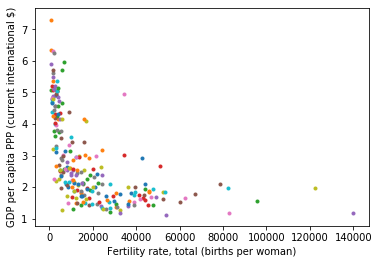

In [5]:
from scipy.stats import pearsonr

f_gdp = pd.read_csv('API_NY.GDP.PCAP.PP.CD_DS2_en_csv_v2_151039/API_NY.GDP.PCAP.PP.CD_DS2_en_csv_v2_151039.csv',skiprows=4)
f_fert = pd.read_csv('API_SP.DYN.TFRT.IN_DS2_en_csv_v2_153225/API_SP.DYN.TFRT.IN_DS2_en_csv_v2_153225.csv',skiprows=4)
codeArr = f_gdp['Country Code']
assert list(f_gdp['Country Code']) == list(f_fert['Country Code']), "Country Code doesn't match"
gdp,fertility = f_gdp['2013'],f_fert['2013']
newdata = {"gdp":gdp,"fertility":fertility}
newdf = pd.DataFrame(newdata)
coef = newdf.corr()
print(coef)
assert len(gdp) == len(fertility), "lengh of two arrays has changed"
for i,j in zip(gdp,fertility):
    plt.scatter(i,j,marker='.')
plt.xlabel('Fertility rate, total (births per woman)')
plt.ylabel('GDP per capita PPP (current international $)')
plt.show()
assert len(gdp) == len(fertility), '2013 stat lenght are not the same'
gdp_mean,fert_mean = np.mean(gdp),np.mean(fertility)
gdp_std,fert_std = np.std(gdp),np.std(fertility)
corr_coefficient = (1/(len(gdp)))*np.sum((gdp-gdp_mean)*(fertility-fert_mean))


## Answer 3

- Correlation Coefficient = -0.537393
- Interpolation: The result is showing a **Negative Correlation** which menas the higher rate of fertility somehow leads to lower GDP percapita and vise versa.
 


## Question 4

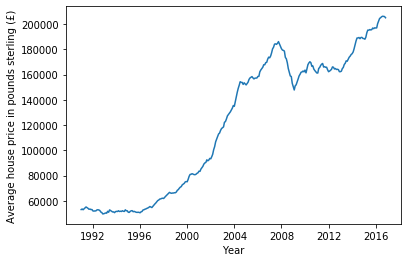

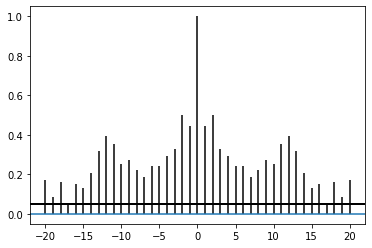

In [77]:
f_monthly = pd.read_excel('monthly.xls',sheet_name='Monthly')
time,price = f_monthly['Unnamed: 0'],f_monthly['Average House Price']
pos = f_monthly.loc[f_monthly['Unnamed: 0'] == '2016-12-01'].index[0]
time,price = time[:pos],price[:pos]
plt.plot_date(time,price,'-')
plt.xlabel("Year")
plt.ylabel("Average house price in pounds sterling (£)")
plt.show()

###########
mrt = []
for i in range (1,len(price)-1):
    mrt.append((price[i]-price[i-1])/price[i-1])
plt.acorr(np.array(mrt), maxlags=20)
plt.axhline(0.05, color='black', lw=2)
plt.show()

## ANSWER 4




## Question 5



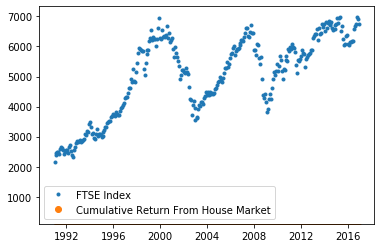

In [79]:
# cumu_ret = np.cumprod(1 + price.values) - 1
# print(cumu_ret)
# plt.plot(time,cumu_ret)
# ((price + 1).cumprod() - 1).plot()
f_ftse = pd.read_csv('FTSE100.csv')
ftse_date,ftse_index = f_ftse['Date'].astype('datetime64[ns]') ,f_ftse['Adj Close']
plt.plot_date(ftse_date,ftse_index,marker='.',label='FTSE Index',)
cumu_ret = []
for i in range (len(price)):
    cumu_ret.append((price[i]-price[0]))
plt.plot_date(ftse_date[:-1],cumu_ret[::-1],label='Cumulative Return From House Market',ls=':')
plt.ylim(bottom=100)
plt.legend()









### MISSING

- How to aclculate the cumulative return


### Reicitation
- Use np.cumsum